First attempts

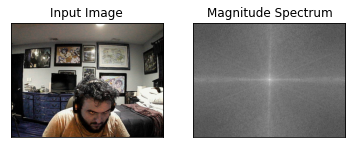

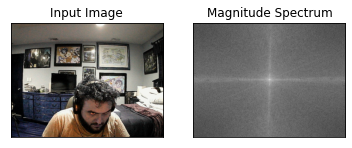

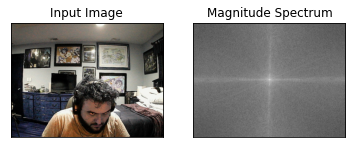

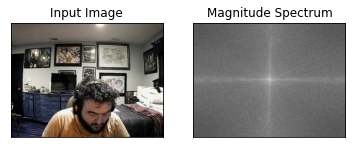

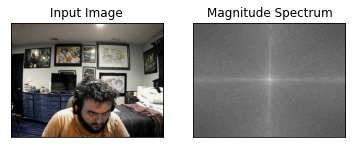

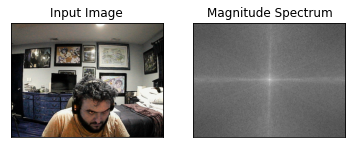

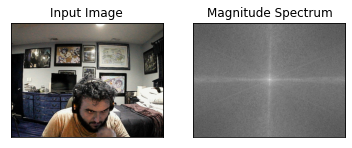

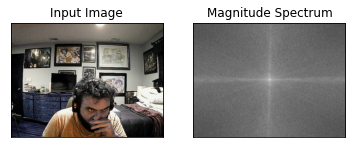

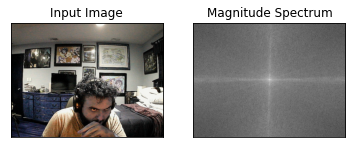

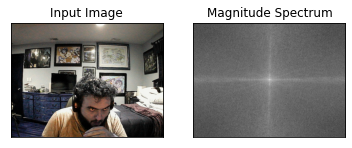

KeyboardInterrupt: 

In [1]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt

cap = cv.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    rows,cols = frame.shape
    nrows = cv.getOptimalDFTSize(rows)
    ncols = cv.getOptimalDFTSize(cols)
    nimg = np.zeros((nrows,ncols))
    nimg[:rows,:cols] = frame
    b,g,r = cv.split(nimg)
    r_dft = cv.dft(np.float32(b),flags = cv.DFT_COMPLEX_OUTPUT)
    r_dft_shift = np.fft.fftshift(r_dft)
    r_magnitude_spectrum = 20*np.log(cv.magnitude(r_dft_shift[:,:,0],r_dft_shift[:,:,1]))
    plt.subplot(121),plt.imshow(frame, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(r_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Display the resulting frame
    cv.imshow('frame',nimg)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()